<a href="https://colab.research.google.com/github/iamantrikshverma/iamantrikshverma/blob/main/datapreprocessing1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# new project

# Data loading

## import libraries

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/YBI-Foundation/Dataset/refs/heads/main/Diabetes%20Missing%20Data.csv')

#data checking

## check data



In [4]:
df.head()

Pregnant  Glucose  Diastolic_BP  Skin_Fold  Serum_Insulin   BMI  \
0         6    148.0          72.0       35.0            NaN  33.6   
1         1     85.0          66.0       29.0            NaN  26.6   
2         8    183.0          64.0        NaN            NaN  23.3   
3         1     89.0          66.0       23.0           94.0  28.1   
4         0    137.0          40.0       35.0          168.0  43.1   

   Diabetes_Pedigree  Age  Class  
0              0.627   50      1  
1              0.351   31      0  
2              0.672   32      1  
3              0.167   21      0  
4              2.288   33      1

In [5]:
df.tail()

Pregnant  Glucose  Diastolic_BP  Skin_Fold  Serum_Insulin   BMI  \
763        10    101.0          76.0       48.0          180.0  32.9   
764         2    122.0          70.0       27.0            NaN  36.8   
765         5    121.0          72.0       23.0          112.0  26.2   
766         1    126.0          60.0        NaN            NaN  30.1   
767         1     93.0          70.0       31.0            NaN  30.4   

     Diabetes_Pedigree  Age  Class  
763              0.171   63      0  
764              0.340   27      0  
765              0.245   30      0  
766              0.349   47      1  
767              0.315   23      0

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Pregnant           768 non-null    int64  
 1   Glucose            763 non-null    float64
 2   Diastolic_BP       733 non-null    float64
 3   Skin_Fold          541 non-null    float64
 4   Serum_Insulin      394 non-null    float64
 5   BMI                757 non-null    float64
 6   Diabetes_Pedigree  768 non-null    float64
 7   Age                768 non-null    int64  
 8   Class              768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.1 KB


In [7]:
df.describe()

Pregnant     Glucose  Diastolic_BP   Skin_Fold  Serum_Insulin  \
count  768.000000  763.000000    733.000000  541.000000     394.000000   
mean     3.845052  121.686763     72.405184   29.153420     155.548223   
std      3.369578   30.535641     12.382158   10.476982     118.775855   
min      0.000000   44.000000     24.000000    7.000000      14.000000   
25%      1.000000   99.000000     64.000000   22.000000      76.250000   
50%      3.000000  117.000000     72.000000   29.000000     125.000000   
75%      6.000000  141.000000     80.000000   36.000000     190.000000   
max     17.000000  199.000000    122.000000   99.000000     846.000000   

              BMI  Diabetes_Pedigree         Age       Class  
count  757.000000         768.000000  768.000000  768.000000  
mean    32.457464           0.471876   33.240885    0.348958  
std      6.924988           0.331329   11.760232    0.476951  
min     18.200000           0.078000   21.000000    0.000000  
25%     27.500000           0.243750   24.000000    0.000000  
50%     32.300000           0.372500   29.000000    0.000000  
75%     36.600000           0.626250   41.000000    1.000000  
max     67.100000           2.420000   81.000000    1.000000

In [8]:
df.describe(include='all')

Pregnant     Glucose  Diastolic_BP   Skin_Fold  Serum_Insulin  \
count  768.000000  763.000000    733.000000  541.000000     394.000000   
mean     3.845052  121.686763     72.405184   29.153420     155.548223   
std      3.369578   30.535641     12.382158   10.476982     118.775855   
min      0.000000   44.000000     24.000000    7.000000      14.000000   
25%      1.000000   99.000000     64.000000   22.000000      76.250000   
50%      3.000000  117.000000     72.000000   29.000000     125.000000   
75%      6.000000  141.000000     80.000000   36.000000     190.000000   
max     17.000000  199.000000    122.000000   99.000000     846.000000   

              BMI  Diabetes_Pedigree         Age       Class  
count  757.000000         768.000000  768.000000  768.000000  
mean    32.457464           0.471876   33.240885    0.348958  
std      6.924988           0.331329   11.760232    0.476951  
min     18.200000           0.078000   21.000000    0.000000  
25%     27.500000           0.243750   24.000000    0.000000  
50%     32.300000           0.372500   29.000000    0.000000  
75%     36.600000           0.626250   41.000000    1.000000  
max     67.100000           2.420000   81.000000    1.000000

## check missing values

In [10]:
df.isnull().sum()

Pregnant               0
Glucose                5
Diastolic_BP          35
Skin_Fold            227
Serum_Insulin        374
BMI                   11
Diabetes_Pedigree      0
Age                    0
Class                  0
dtype: int64

missing values found

## outliers/ exterma

### IQR Method

In [11]:
q1 = df.quantile(0.25)
q3 = df.quantile(0.75)
iqr = q3-q1

# lower bound and upper bound
lower_bound = q1 - 1.5*iqr
upper_bound = q3 + 1.5*iqr

# identify outlier
outliers = df[(df < lower_bound) | (df > upper_bound)]

print("Outliers in 'df' using IQR method:")
outliers

Outliers in 'df' using IQR method:


Pregnant  Glucose  Diastolic_BP  Skin_Fold  Serum_Insulin  BMI  \
0         NaN      NaN           NaN        NaN            NaN  NaN   
1         NaN      NaN           NaN        NaN            NaN  NaN   
2         NaN      NaN           NaN        NaN            NaN  NaN   
3         NaN      NaN           NaN        NaN            NaN  NaN   
4         NaN      NaN           NaN        NaN            NaN  NaN   
..        ...      ...           ...        ...            ...  ...   
763       NaN      NaN           NaN        NaN            NaN  NaN   
764       NaN      NaN           NaN        NaN            NaN  NaN   
765       NaN      NaN           NaN        NaN            NaN  NaN   
766       NaN      NaN           NaN        NaN            NaN  NaN   
767       NaN      NaN           NaN        NaN            NaN  NaN   

     Diabetes_Pedigree  Age  Class  
0                  NaN  NaN    NaN  
1                  NaN  NaN    NaN  
2                  NaN  NaN    NaN  
3                  NaN  NaN    NaN  
4                2.288  NaN    NaN  
..                 ...  ...    ...  
763                NaN  NaN    NaN  
764                NaN  NaN    NaN  
765                NaN  NaN    NaN  
766                NaN  NaN    NaN  
767                NaN  NaN    NaN  

[768 rows x 9 columns]

outlier found in diabetes_pedigree
so we should clean the data first

### find duplicates

In [12]:
df.duplicated().sum()
df[df.duplicated()]


Empty DataFrame
Columns: [Pregnant, Glucose, Diastolic_BP, Skin_Fold, Serum_Insulin, BMI, Diabetes_Pedigree, Age, Class]
Index: []

not found

# Data cleaning

In [13]:
# Percentage of missing values in each column
missing_percentage = df.isnull().sum() * 100 / len(df)
missing_percentage


Pregnant              0.000000
Glucose               0.651042
Diastolic_BP          4.557292
Skin_Fold            29.557292
Serum_Insulin        48.697917
BMI                   1.432292
Diabetes_Pedigree     0.000000
Age                   0.000000
Class                 0.000000
dtype: float64

In [14]:

# Identify columns with more than 30% missing values
columns_to_drop = missing_percentage[missing_percentage > 30].index

# Drop the identified columns
df = df.drop(columns=columns_to_drop)




### drop missing values

In [15]:
df = df.dropna()


## remove outliers

In [16]:
# Reindex lower_bound and upper_bound to match df's columns
lower_bound = lower_bound[df.columns]
upper_bound = upper_bound[df.columns]

# Remove rows with outliers
df_no_outliers = df[(df >= lower_bound) & (df <= upper_bound)].dropna()

# Display the DataFrame without outliers
print("\nDataFrame after removing outliers:")
df_no_outliers


DataFrame after removing outliers:


Pregnant  Glucose  Diastolic_BP  Skin_Fold   BMI  Diabetes_Pedigree  \
0         6.0    148.0          72.0       35.0  33.6              0.627   
1         1.0     85.0          66.0       29.0  26.6              0.351   
3         1.0     89.0          66.0       23.0  28.1              0.167   
6         3.0     78.0          50.0       32.0  31.0              0.248   
8         2.0    197.0          70.0       45.0  30.5              0.158   
..        ...      ...           ...        ...   ...                ...   
761       9.0    170.0          74.0       31.0  44.0              0.403   
763      10.0    101.0          76.0       48.0  32.9              0.171   
764       2.0    122.0          70.0       27.0  36.8              0.340   
765       5.0    121.0          72.0       23.0  26.2              0.245   
767       1.0     93.0          70.0       31.0  30.4              0.315   

      Age  Class  
0    50.0      1  
1    31.0      0  
3    21.0      0  
6    26.0      1  
8    53.0      1  
..    ...    ...  
761  43.0      1  
763  63.0      0  
764  27.0      0  
765  30.0      0  
767  23.0      0  

[487 rows x 8 columns]

there is no duplicates so we not need to drop them

In [17]:
df_no_outliers.info()

<class 'pandas.core.frame.DataFrame'>
Index: 487 entries, 0 to 767
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Pregnant           487 non-null    float64
 1   Glucose            487 non-null    float64
 2   Diastolic_BP       487 non-null    float64
 3   Skin_Fold          487 non-null    float64
 4   BMI                487 non-null    float64
 5   Diabetes_Pedigree  487 non-null    float64
 6   Age                487 non-null    float64
 7   Class              487 non-null    int64  
dtypes: float64(7), int64(1)
memory usage: 34.2 KB


In [18]:
df_no_outliers.describe()

Pregnant     Glucose  Diastolic_BP   Skin_Fold         BMI  \
count  487.000000  487.000000    487.000000  487.000000  487.000000   
mean     3.441478  119.924025     71.277207   28.698152   32.494045   
std      3.158398   30.068857     11.102179    9.851639    6.354117   
min      0.000000   56.000000     44.000000    7.000000   18.200000   
25%      1.000000   98.000000     64.000000   21.000000   27.800000   
50%      2.000000  114.000000     70.000000   29.000000   32.700000   
75%      5.000000  139.500000     80.000000   36.000000   36.500000   
max     13.000000  198.000000    104.000000   54.000000   50.000000   

       Diabetes_Pedigree         Age       Class  
count         487.000000  487.000000  487.000000  
mean            0.452663   31.162218    0.308008  
std             0.252694   10.254196    0.462145  
min             0.085000   21.000000    0.000000  
25%             0.254500   23.000000    0.000000  
50%             0.399000   28.000000    0.000000  
75%             0.612500   37.000000    1.000000  
max             1.189000   63.000000    1.000000

first we should set target variable

<Axes: xlabel='Class'>

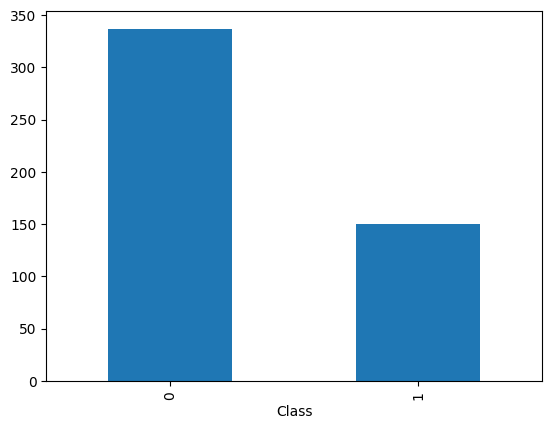

In [19]:
df_no_outliers['Class'].value_counts()
df_no_outliers['Class'].value_counts().plot(kind='bar')


### single relation of target variables with features

### Q1. check distribution of target variable 'class'  with  'Pregnent'.

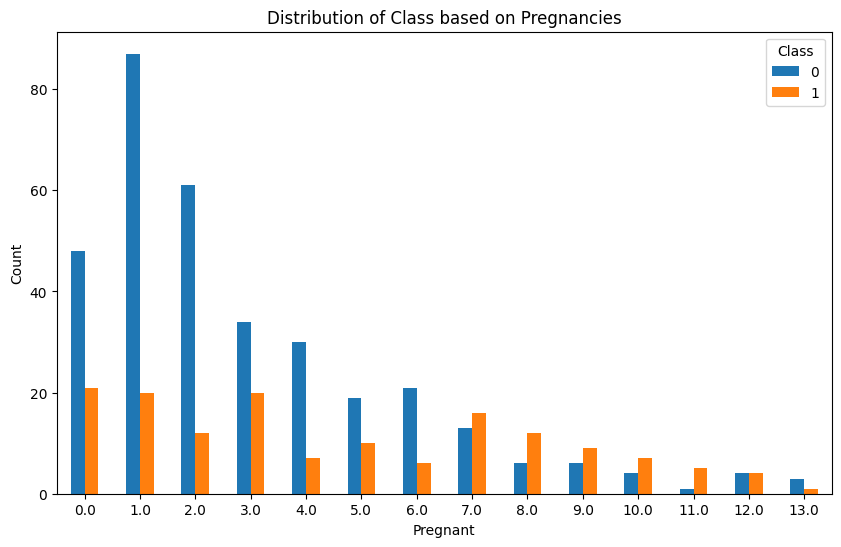

In [20]:
import matplotlib.pyplot as plt

pregnancy_class_counts = df_no_outliers.groupby(['Pregnant', 'Class'])['Class'].count().unstack(fill_value=0)

pregnancy_class_counts.plot(kind='bar', figsize=(10, 6))
plt.title('Distribution of Class based on Pregnancies')
plt.xlabel('Pregnant')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Class')
plt.show()


those womens who are 1 time pregnent has less chances of having diabities

### Q2. check distribution of target variable 'class'  with  '*Diastolic_BP'.

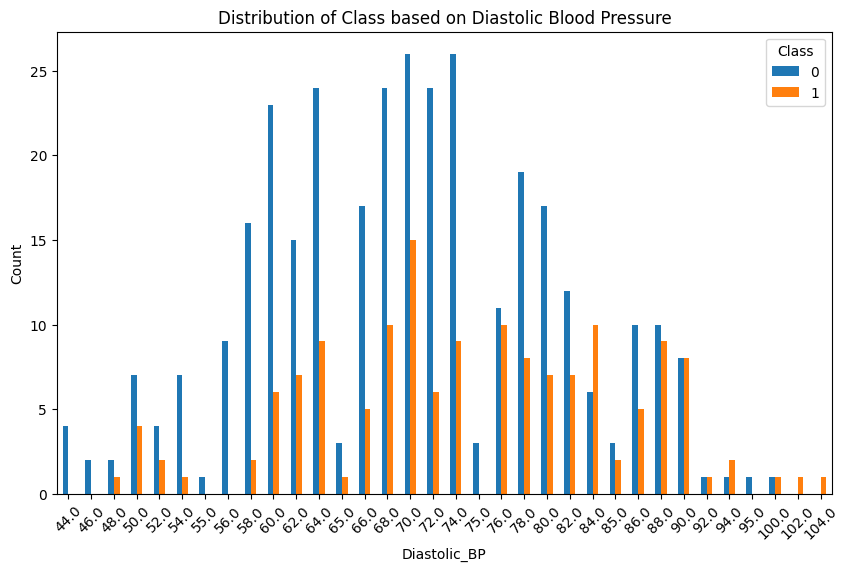

In [21]:

diastolic_bp_class_counts = df_no_outliers.groupby(['Diastolic_BP', 'Class'])['Class'].count().unstack(fill_value=0)


diastolic_bp_class_counts.plot(kind='bar', figsize=(10, 6))
plt.title('Distribution of Class based on Diastolic Blood Pressure')
plt.xlabel('Diastolic_BP')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend(title='Class')
plt.show()


Class 0 dominates across all diastolic BP levels, with both classes peaking around 70-80 mmHg and fewer cases at extreme BP values.

### Q3. check distribution of target variable 'class'  with  'Skin_Fold'.

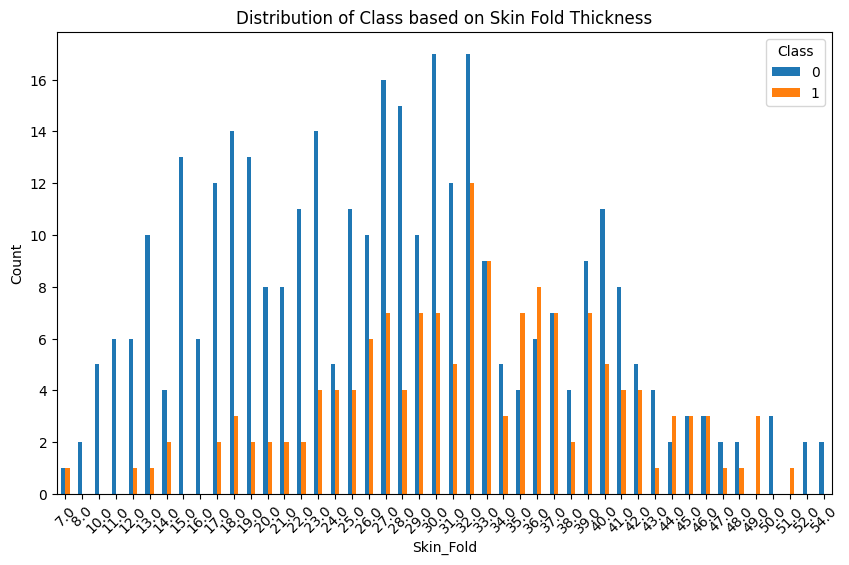

In [22]:

skin_fold_class_counts = df_no_outliers.groupby(['Skin_Fold', 'Class'])['Class'].count().unstack(fill_value=0)

skin_fold_class_counts.plot(kind='bar', figsize=(10, 6))
plt.title('Distribution of Class based on Skin Fold Thickness')
plt.xlabel('Skin_Fold')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend(title='Class')
plt.show()


The chart shows that higher skin fold thickness is associated with an increased presence of diabetes (Class 1), especially in the range of 20-40 mm, though non-diabetics (Class 0) remain the majority across all values.

### Q4. check distribution of target variable 'class'  with  'Age'.

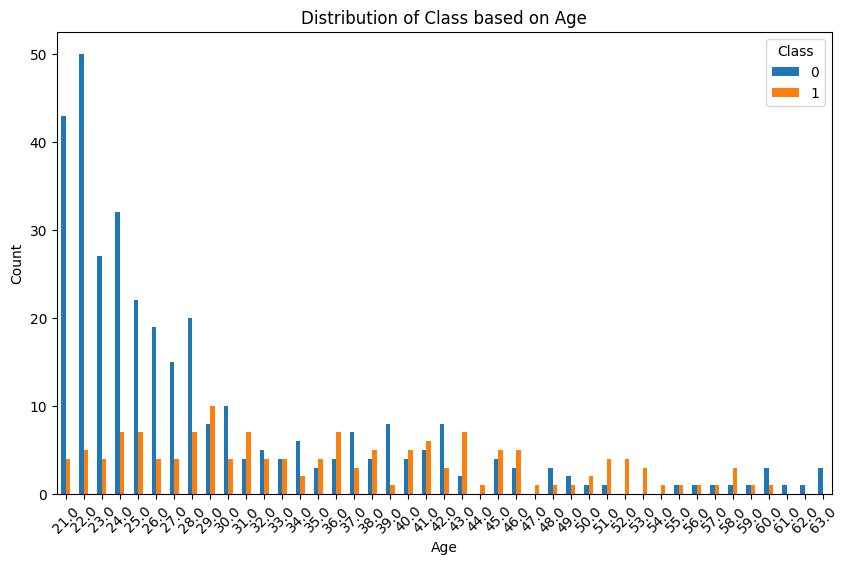

In [23]:
age_class_counts = df_no_outliers.groupby(['Age', 'Class'])['Class'].count().unstack(fill_value=0)

age_class_counts.plot(kind='bar', figsize=(10, 6))
plt.title('Distribution of Class based on Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend(title='Class')
plt.show()


The chart indicates that diabetes (Class 1) is more prevalent in older individuals, particularly beyond 30 years of age, while younger individuals (below 25) are mostly non-diabetic (Class 0).

In [24]:
df_no_outliers.nunique()

Pregnant              14
Glucose              124
Diastolic_BP          34
Skin_Fold             46
BMI                  211
Diabetes_Pedigree    377
Age                   43
Class                  2
dtype: int64

### Q5. check distribution of target variable 'class'  with  'glucose'.

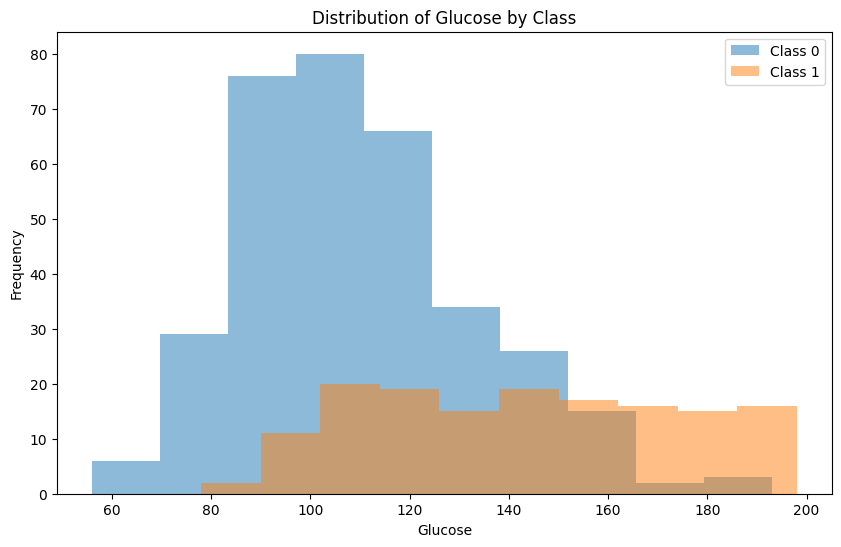

In [25]:
glucose_class_counts = df_no_outliers.groupby(['Glucose', 'Class'])['Class'].count().unstack(fill_value=0)
# alternative way to visualize the glucose distribution
plt.figure(figsize=(10, 6))
plt.hist(df_no_outliers[df_no_outliers['Class'] == 0]['Glucose'], alpha=0.5, label='Class 0')
plt.hist(df_no_outliers[df_no_outliers['Class'] == 1]['Glucose'], alpha=0.5, label='Class 1')
plt.xlabel('Glucose')
plt.ylabel('Frequency')
plt.title('Distribution of Glucose by Class')
plt.legend()
plt.show()


The chart shows that non-diabetic individuals (Class 0) have glucose levels mostly below 140, while diabetic individuals (Class 1) are more frequent at higher glucose levels, especially beyond 140.

### Q5. check distribution of target variable 'class'  with  'BMI'.

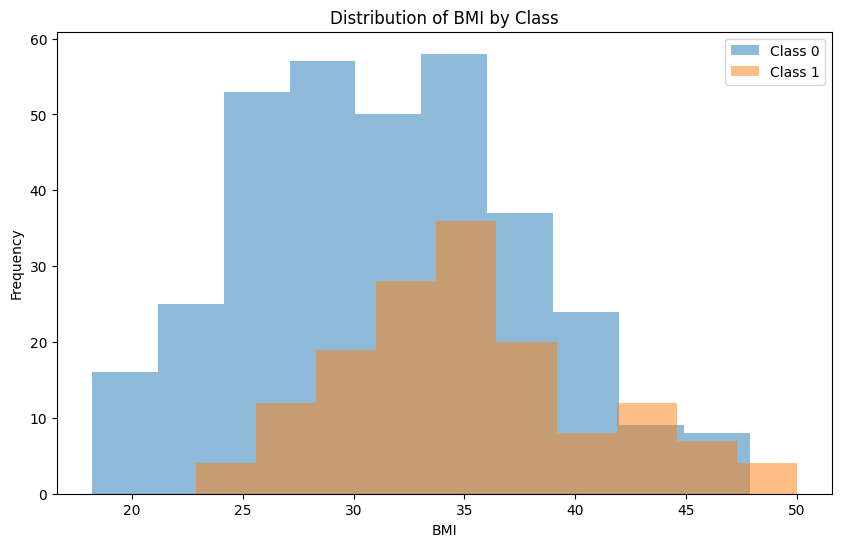

In [26]:
plt.figure(figsize=(10, 6))
plt.hist(df_no_outliers[df_no_outliers['Class'] == 0]['BMI'], alpha=0.5, label='Class 0')
plt.hist(df_no_outliers[df_no_outliers['Class'] == 1]['BMI'], alpha=0.5, label='Class 1')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.title('Distribution of BMI by Class')
plt.legend()
plt.show()


The chart shows that higher BMI values (above 30) are more associated with diabetes (Class 1), while lower BMI values are more common among non-diabetic individuals (Class 0).


### Q6. check distribution of target variable 'class'  with  'Diabetes_Pedigree'.

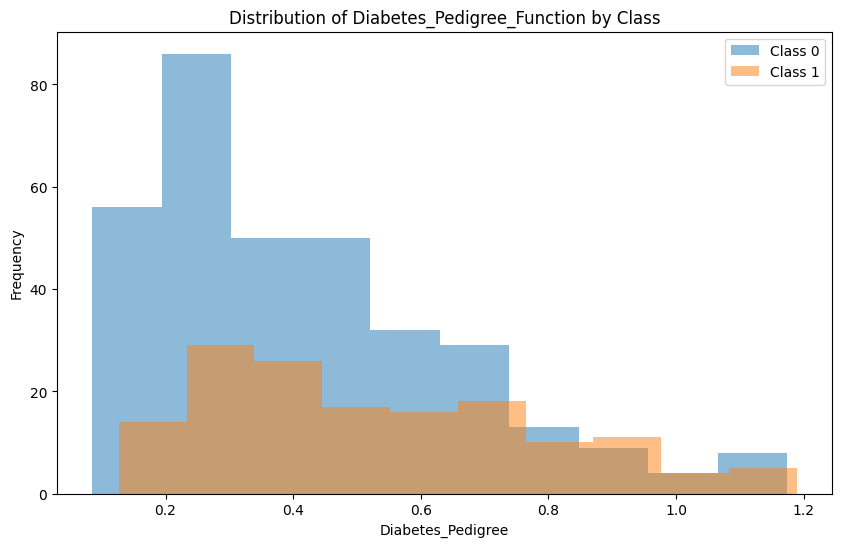

In [27]:

plt.figure(figsize=(10, 6))
plt.hist(df_no_outliers[df_no_outliers['Class'] == 0]['Diabetes_Pedigree'], alpha=0.5, label='Class 0')
plt.hist(df_no_outliers[df_no_outliers['Class'] == 1]['Diabetes_Pedigree'], alpha=0.5, label='Class 1')
plt.xlabel('Diabetes_Pedigree')
plt.ylabel('Frequency')
plt.title('Distribution of Diabetes_Pedigree_Function by Class')
plt.legend()
plt.show()


The chart shows that higher Diabetes Pedigree Function values (above 0.5) are more associated with diabetes (Class 1), while lower values are more common in non-diabetic individuals (Class 0).

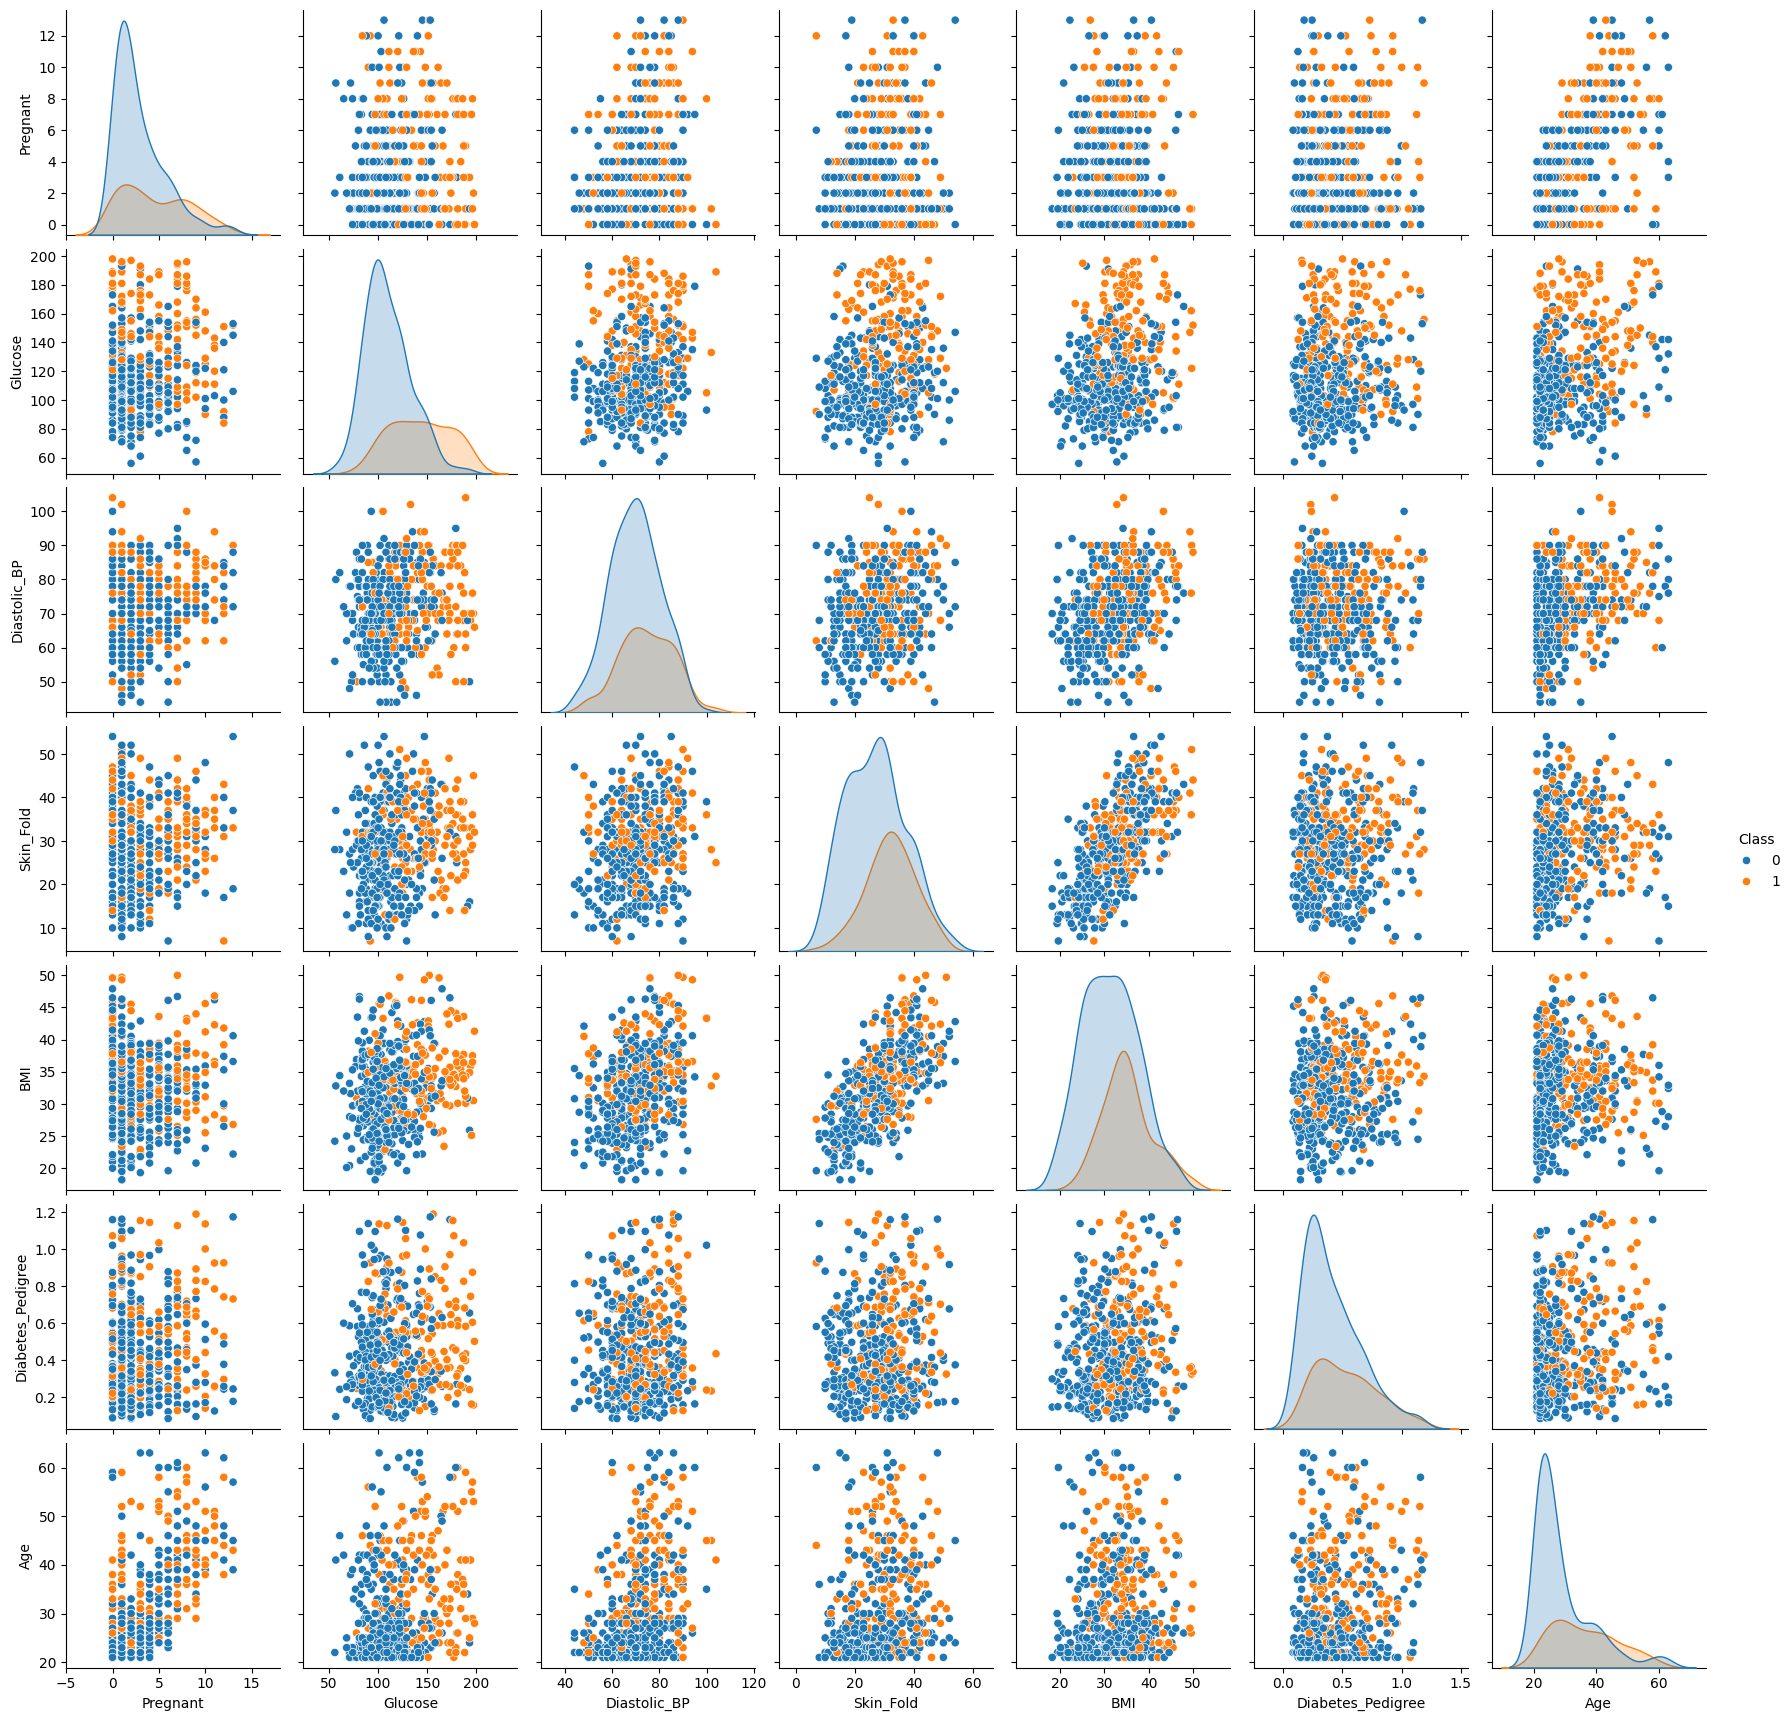

In [28]:
import seaborn as sns

sns.pairplot(df_no_outliers, hue='Class')
plt.show()


This pairplot visualization shows the relationships between multiple features, categorized by diabetes class (0: non-diabetic, 1: diabetic).
Key observations:
1. Glucose vs. Class: Higher glucose levels tend to be associated with diabetes (orange points).
2. BMI vs. Class: Higher BMI values show a slight correlation with diabetes.
3. Pregnancies vs. Class: More pregnancies seem slightly related to diabetes.
4. Diabetes Pedigree vs. Class: Higher values have more orange points.

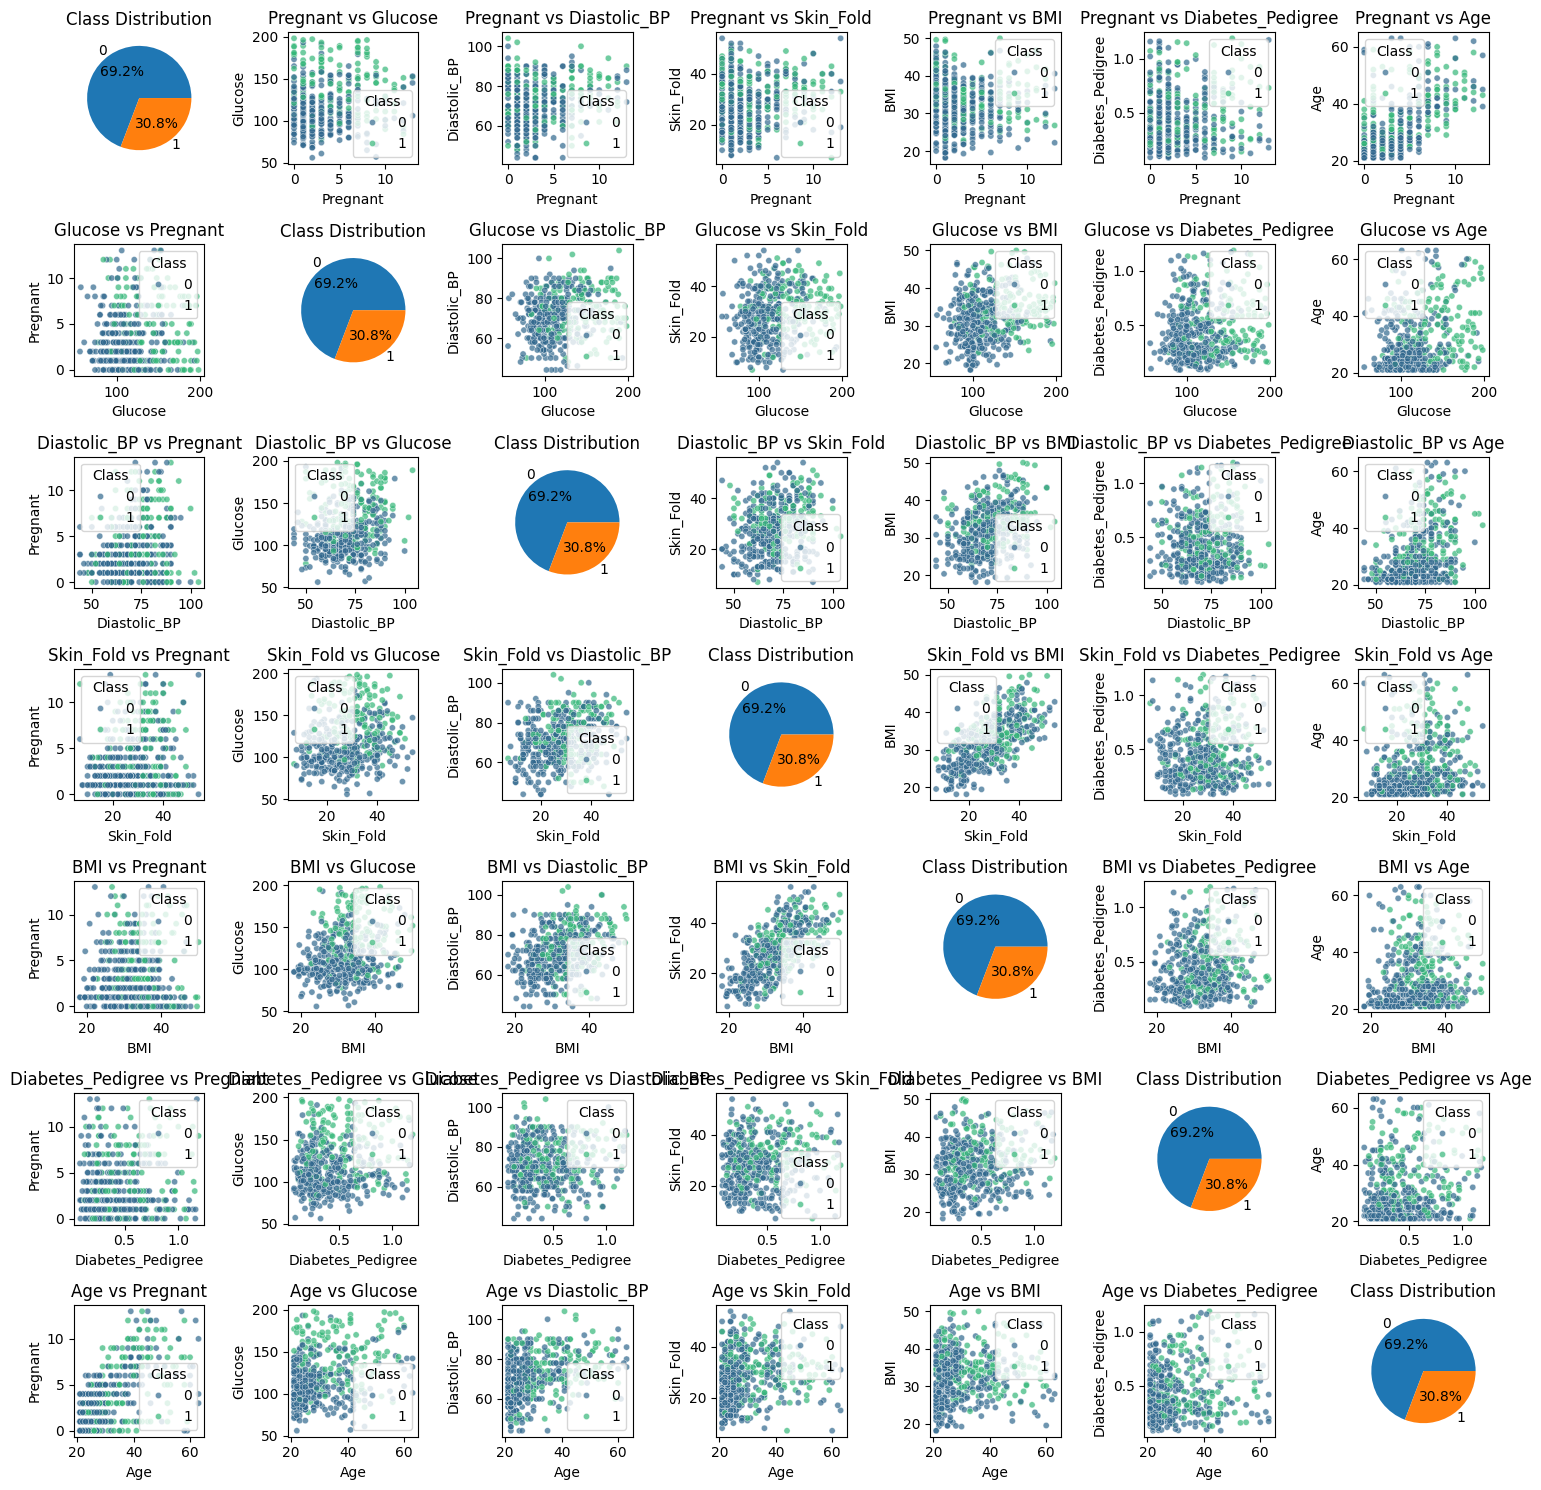

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.gridspec as gridspec



def create_pie_chart(data, ax):
    """Creates a pie chart on the given axes."""
    class_counts = data['Class'].value_counts()
    ax.pie(class_counts, labels=class_counts.index, autopct='%1.1f%%')
    ax.set_title('Class Distribution')


# Select relevant numerical columns for pairplot
numerical_cols = ['Pregnant', 'Glucose', 'Diastolic_BP', 'Skin_Fold', 'BMI', 'Diabetes_Pedigree', 'Age']
num_cols = len(numerical_cols)


fig = plt.figure(figsize=(15, 15))  # Adjust figsize for better visualization
gs = gridspec.GridSpec(num_cols, num_cols)


# Iterate over the numerical columns for the pair plot
for i, col1 in enumerate(numerical_cols):
    for j, col2 in enumerate(numerical_cols):
        ax = plt.subplot(gs[i, j])
        if i == j:  # Diagonal: Pie chart for class distribution
          create_pie_chart(df_no_outliers, ax) # Pass your cleaned data here
        else: # Other cells: Scatter plot
          sns.scatterplot(x=col1, y=col2, data=df_no_outliers, hue='Class', ax=ax, s=20, alpha=0.7, palette='viridis')
          ax.set_title(f'{col1} vs {col2}')


plt.tight_layout()
plt.show()


This visualization presents scatter plots for feature relationships in the dataset, with a pie chart showing class distribution (69.2% non-diabetic, 30.8% diabetic).
Key takeaways:
1. Glucose vs. Other Features: Higher glucose levels correlate with a higher probability of diabetes.
2. BMI vs. Other Features: Increased BMI appears more common in diabetic cases.
3. Diastolic BP & Skin Fold Thickness: No strong visible correlation with diabetes.
4. Age Factor: Older individuals might have a higher risk of diabetes.

In [34]:
import plotly.express as px

# Scatter plot
fig = px.scatter(df_no_outliers, x='Glucose', y='BMI', color='Class',
                 title='Glucose vs. BMI',
                 labels={'Glucose': 'Glucose Level', 'BMI': 'Body Mass Index', 'Class': 'Diabetes Class'})
fig.show()


# Histogram
fig = px.histogram(df_no_outliers, x='Age', color='Class',
                   title='Distribution of Age by Class',
                   labels={'Age': 'Age', 'Class': 'Diabetes Class'},
                   marginal='box') # Add a box plot as marginal
fig.show()

# Box plot
fig = px.box(df_no_outliers, x='Class', y='Diabetes_Pedigree',
             title='Diabetes Pedigree Function by Class',
             labels={'Class': 'Diabetes Class', 'Diabetes_Pedigree': 'Diabetes Pedigree Function'})
fig.show()


# Interactive pairplot-like visualization using scatter_matrix
fig = px.scatter_matrix(df_no_outliers, dimensions=['Pregnant', 'Glucose', 'Diastolic_BP', 'Skin_Fold', 'BMI', 'Diabetes_Pedigree', 'Age'], color='Class')
fig.update_traces(diagonal_visible=False) # Hide the diagonal histograms
fig.show()


1. Higher glucose levels generally correlate with a higher likelihood of diabetes (yellow points), but BMI alone does not strongly differentiate diabetic and non-diabetic individuals.
2. Diabetic individuals (blue) tend to be older than non-diabetic individuals (red), with a wider age distribution, whereas non-diabetics are more concentrated in younger age groups.
3. Diabetic individuals tend to have a higher median diabetes pedigree function (family history influence) compared to non-diabetic individuals, with a wider distribution and higher upper range.
4. Higher glucose, BMI, and age strongly correlate with diabetes, while other features show weaker trends.

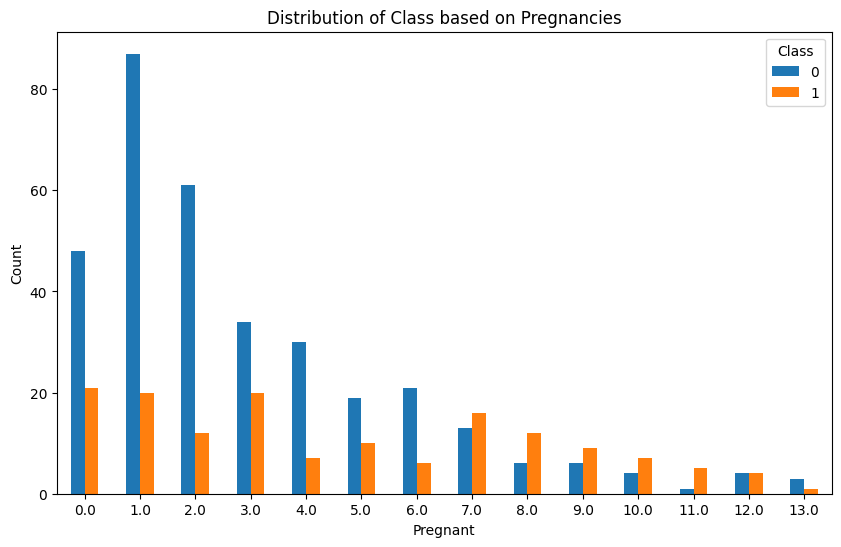

In [36]:
import matplotlib.pyplot as plt
pregnancy_class_counts = df_no_outliers.groupby(['Pregnant', 'Class'])['Class'].count().unstack(fill_value=0)
pregnancy_class_counts.plot(kind='bar', figsize=(10, 6))
plt.title('Distribution of Class based on Pregnancies')
plt.xlabel('Pregnant')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Class')
plt.show()


Diabetes prevalence increases with pregnancy count, especially beyond 6 pregnancies.

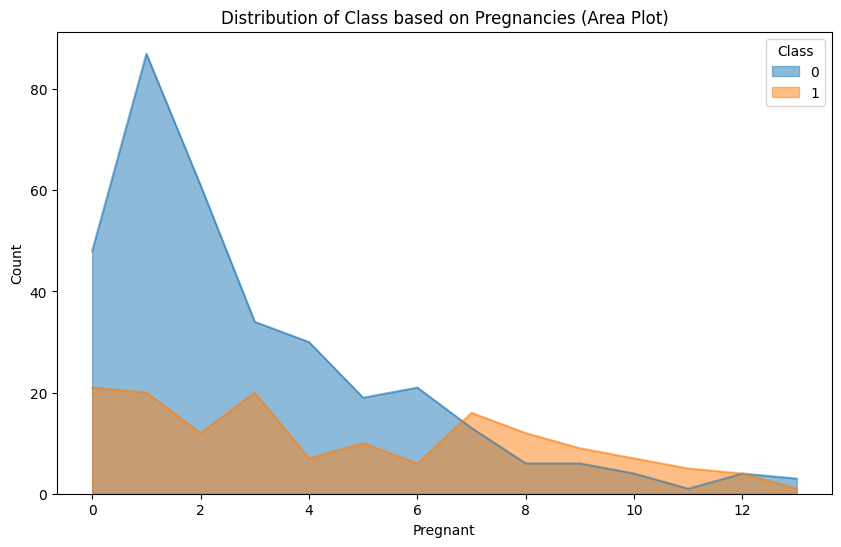

In [37]:
import pandas as pd
import matplotlib.pyplot as plt

pregnancy_class_counts = df_no_outliers.groupby(['Pregnant', 'Class'])['Class'].count().unstack(fill_value=0)
pregnancy_class_counts.plot(kind='area', figsize=(10, 6), stacked=False) # stacked=False for non-stacked area plot

plt.title('Distribution of Class based on Pregnancies (Area Plot)')
plt.xlabel('Pregnant')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Class')
plt.show()


Diabetes prevalence surpasses non-diabetes cases beyond six pregnancies.


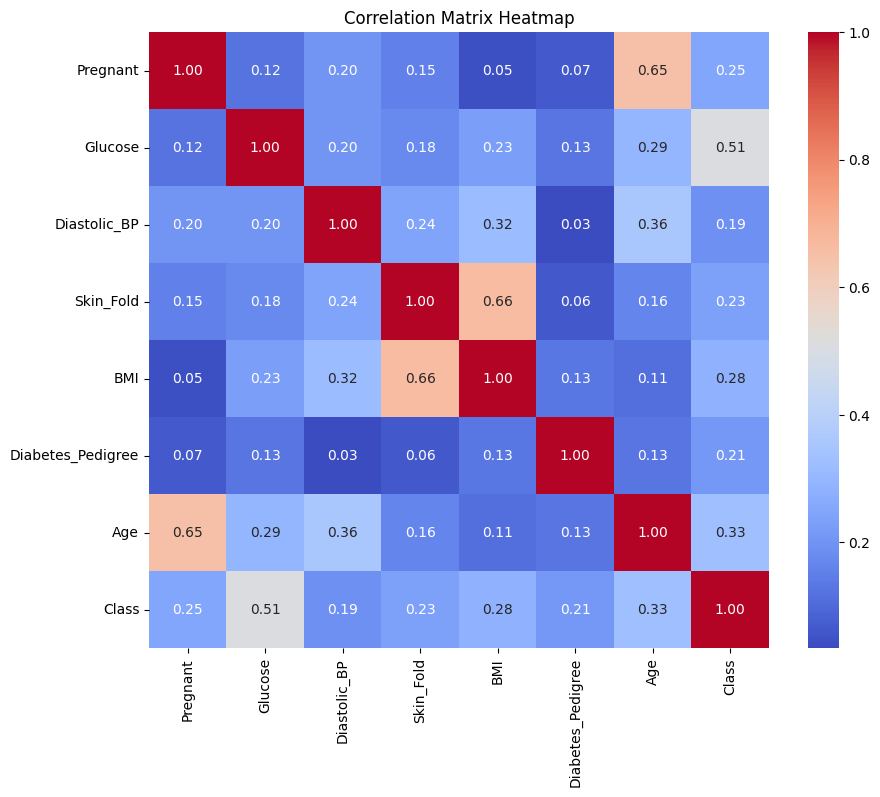

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 8))
correlation_matrix = df_no_outliers.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()


Glucose shows the highest correlation (0.51) with diabetes class, followed by Age (0.33) and BMI (0.28).

In [41]:
import plotly.express as px
fig = px.scatter(df_no_outliers, x='Glucose', y='BMI', size='Age', color='Class',
                 title='Glucose vs. BMI with Age and Class',
                 labels={'Glucose': 'Glucose Level', 'BMI': 'Body Mass Index', 'Age': 'Age', 'Class': 'Diabetes Class'})
fig.show()


The scatter plot shows that higher glucose levels and BMI are associated with a higher likelihood of diabetes (yellow points), while lower glucose levels are predominantly non-diabetic (dark blue points).

In [40]:
import plotly.graph_objects as go
categories = ['Pregnant', 'Glucose', 'Diastolic_BP', 'Skin_Fold', 'BMI', 'Diabetes_Pedigree', 'Age']
# Example data (replace with your actual data)
data = df_no_outliers.groupby('Class').mean().loc[[0,1], categories].values.tolist()


fig = go.Figure()

for i, class_data in enumerate(data):
    fig.add_trace(go.Scatterpolar(
        r=class_data,
        theta=categories,
        fill='toself',
        name=f'Class {i}'
    ))

fig.update_layout(
    polar=dict(
        radialaxis=dict(
            visible=True,
            range=[0, max(max(data[0]), max(data[1]))]  # Adjust range based on your data
        )
    ),
    showlegend=True
)

fig.show()


The radar chart compares different health parameters for diabetic (Class 1) and non-diabetic (Class 0) individuals. It shows that glucose levels are significantly higher in the diabetic group. Other parameters, such as BMI and skin fold thickness, also show slight differences, but glucose is the most distinguishing factor.









# data transformation

In [76]:
from sklearn.preprocessing import MinMaxScaler

# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Select numerical features to scale (exclude 'Class')
numerical_features = ['Pregnant', 'Glucose', 'Diastolic_BP', 'Skin_Fold', 'BMI', 'Diabetes_Pedigree', 'Age']
df_scaled = df_no_outliers.copy()  # Create a copy to avoid modifying the original DataFrame


# Fit the scaler on the numerical features and transform them
df_scaled[numerical_features] = scaler.fit_transform(df_no_outliers[numerical_features])

# Display the scaled DataFrame
print("\nDataFrame after min-max scaling:")
df_scaled



DataFrame after min-max scaling:


Pregnant   Glucose  Diastolic_BP  Skin_Fold       BMI  Diabetes_Pedigree  \
0    0.461538  0.647887      0.466667   0.595745  0.484277           0.490942   
1    0.076923  0.204225      0.366667   0.468085  0.264151           0.240942   
3    0.076923  0.232394      0.366667   0.340426  0.311321           0.074275   
6    0.230769  0.154930      0.100000   0.531915  0.402516           0.147645   
8    0.153846  0.992958      0.433333   0.808511  0.386792           0.066123   
..        ...       ...           ...        ...       ...                ...   
761  0.692308  0.802817      0.500000   0.510638  0.811321           0.288043   
763  0.769231  0.316901      0.533333   0.872340  0.462264           0.077899   
764  0.153846  0.464789      0.433333   0.425532  0.584906           0.230978   
765  0.384615  0.457746      0.466667   0.340426  0.251572           0.144928   
767  0.076923  0.260563      0.433333   0.510638  0.383648           0.208333   

          Age  Class  
0    0.690476      1  
1    0.238095      0  
3    0.000000      0  
6    0.119048      1  
8    0.761905      1  
..        ...    ...  
761  0.523810      1  
763  1.000000      0  
764  0.142857      0  
765  0.214286      0  
767  0.047619      0  

[487 rows x 8 columns]

In [45]:
class_counts = df_scaled['Class'].value_counts()
print(class_counts)

# Check if the dataset is balanced (e.g., within 10% difference)
if abs(class_counts[0] - class_counts[1]) / len(df_scaled) <= 0.1:
    print("Dataset is approximately balanced.")
else:
    print("Dataset is imbalanced.")


Class
0    337
1    150
Name: count, dtype: int64
Dataset is imbalanced.


In [46]:
from imblearn.over_sampling import SMOTE

# Separate features (X) and target variable (y)
X = df_scaled.drop('Class', axis=1)
y = df_scaled['Class']

# Initialize SMOTE
smote = SMOTE(random_state=42)  # Set a random state for reproducibility

# Apply SMOTE to oversample the minority class
X_resampled, y_resampled = smote.fit_resample(X, y)

# Create a new balanced DataFrame
df_balanced = pd.DataFrame(X_resampled, columns=X.columns)
df_balanced['Class'] = y_resampled

# Display class counts after balancing
print("\nClass counts after balancing:")
print(df_balanced['Class'].value_counts())



Class counts after balancing:
Class
1    337
0    337
Name: count, dtype: int64


# model


In [60]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Separate features (X) and target variable (y)
X = df_balanced.drop('Class', axis=1)
y = df_balanced['Class']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train a RandomForestClassifier
model_rf = RandomForestClassifier(random_state=42)  # You can adjust hyperparameters here
model_rf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model_rf.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
accuracy_rf = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy_rf}")


              precision    recall  f1-score   support

           0       0.92      0.79      0.85        68
           1       0.82      0.93      0.87        67

    accuracy                           0.86       135
   macro avg       0.87      0.86      0.86       135
weighted avg       0.87      0.86      0.86       135

[[54 14]
 [ 5 62]]
Accuracy: 0.8592592592592593


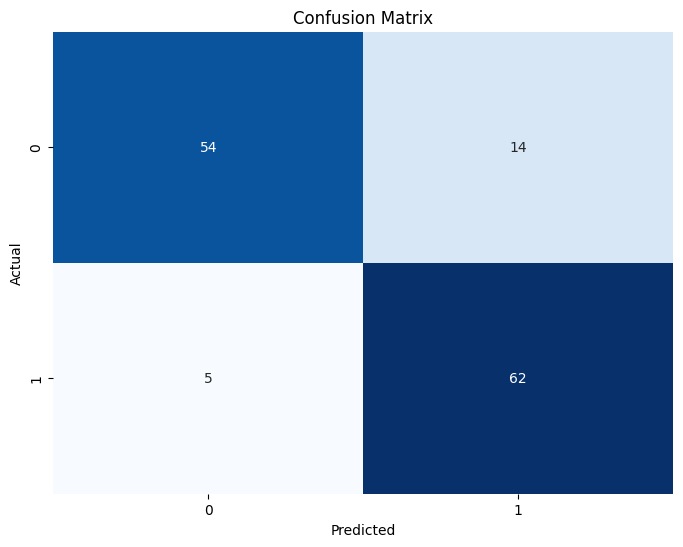

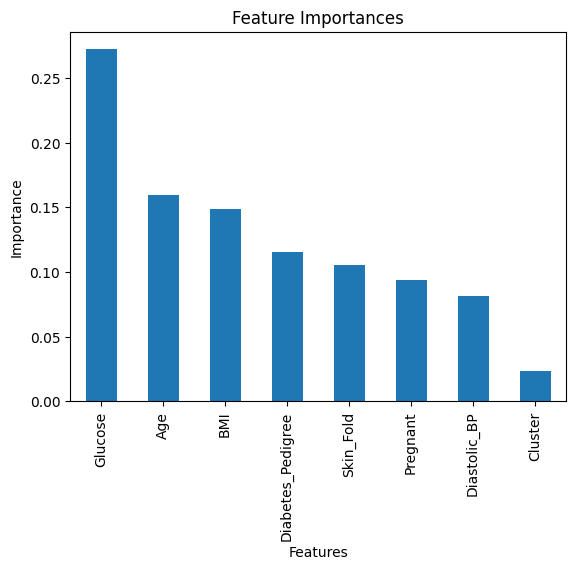

In [62]:
# Plot the confusion matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


# Plot the feature importances
import pandas as pd

feature_importances = pd.Series(model_rf.feature_importances_, index=X.columns)
feature_importances.sort_values(ascending=False).plot(kind='bar')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importances')
plt.show()


1. The model has 85.9% accuracy, 81.6% precision, 92.5% recall, and an F1-score of 86.7%, indicating strong performance with room to reduce false positives.
2. The most important feature for prediction is Glucose, followed by Age and BMI, while Cluster has the least influence.

              precision    recall  f1-score   support

           0       0.82      0.74      0.78        68
           1       0.76      0.84      0.79        67

    accuracy                           0.79       135
   macro avg       0.79      0.79      0.78       135
weighted avg       0.79      0.79      0.78       135

[[50 18]
 [11 56]]
Accuracy: 0.7851851851851852


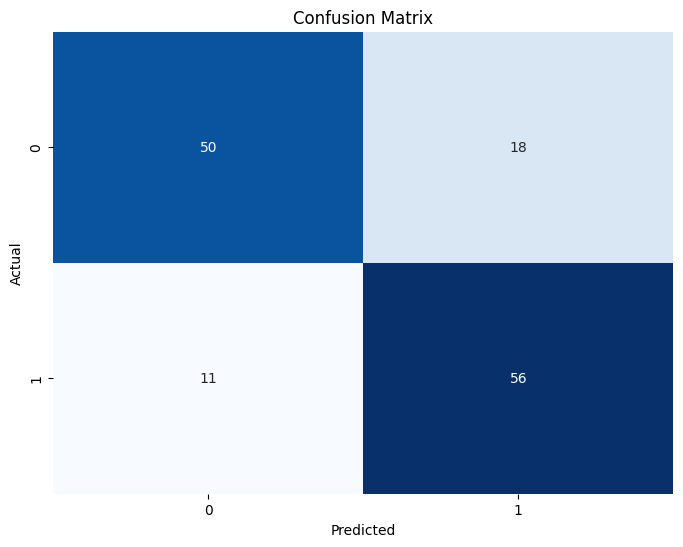

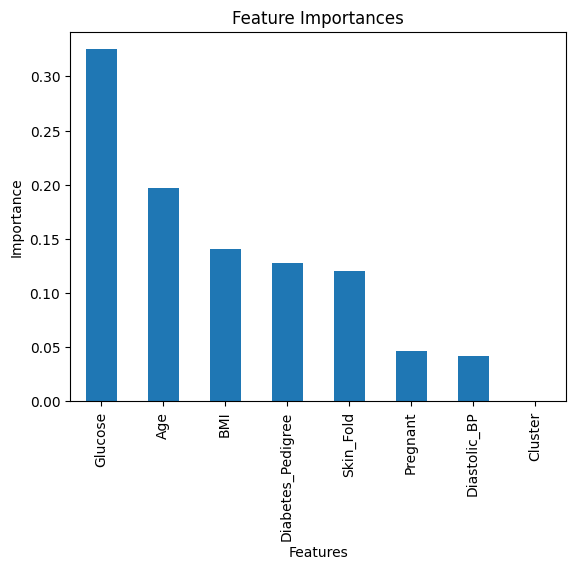

In [63]:
from sklearn.tree import DecisionTreeClassifier

# Separate features (X) and target variable (y)
X = df_balanced.drop('Class', axis=1)
y = df_balanced['Class']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train a DecisionTreeClassifier
model_dt = DecisionTreeClassifier(random_state=42)  # You can adjust hyperparameters here
model_dt.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model_dt.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
accuracy_dt = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy_dt}")

# Plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Plot the feature importances
feature_importances = pd.Series(model_dt.feature_importances_, index=X.columns)
feature_importances.sort_values(ascending=False).plot(kind='bar')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importances')
plt.show()


1. The confusion matrix shows 50 true negatives, 56 true positives, 18 false positives, and 11 false negatives, indicating the model's classification performance.
2. Glucose is the most significant predictor for diabetes, followed by BMI and Age, while pregnancy and diastolic blood pressure have the least influence.

              precision    recall  f1-score   support

           0       0.95      0.79      0.86        68
           1       0.82      0.96      0.88        67

    accuracy                           0.87       135
   macro avg       0.88      0.87      0.87       135
weighted avg       0.88      0.87      0.87       135

[[54 14]
 [ 3 64]]
Accuracy: 0.8740740740740741


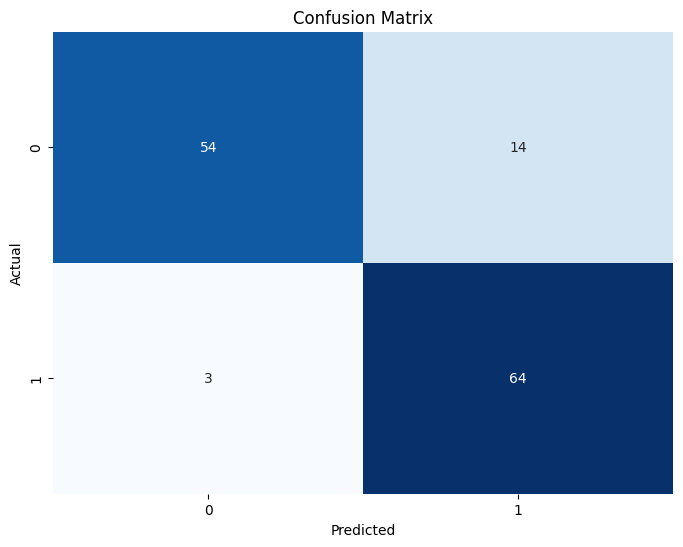

In [64]:
from sklearn.neighbors import KNeighborsClassifier

# Separate features (X) and target variable (y)
X = df_balanced.drop('Class', axis=1)
y = df_balanced['Class']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train a KNeighborsClassifier
model_kn = KNeighborsClassifier(n_neighbors=5)  # You can adjust hyperparameters here
model_kn.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model_kn.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
accuracy_kn = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy_kn}")

# Plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


The model correctly predicts 54 non-diabetic cases (Class 0) and 64 diabetic cases (Class 1), but misclassifies 14 non-diabetic as diabetic and 3 diabetic as non-diabetic, indicating good overall performance but room for reducing false positives.

              precision    recall  f1-score   support

           0       0.75      0.78      0.76        68
           1       0.77      0.73      0.75        67

    accuracy                           0.76       135
   macro avg       0.76      0.76      0.76       135
weighted avg       0.76      0.76      0.76       135

[[53 15]
 [18 49]]
Accuracy: 0.7555555555555555


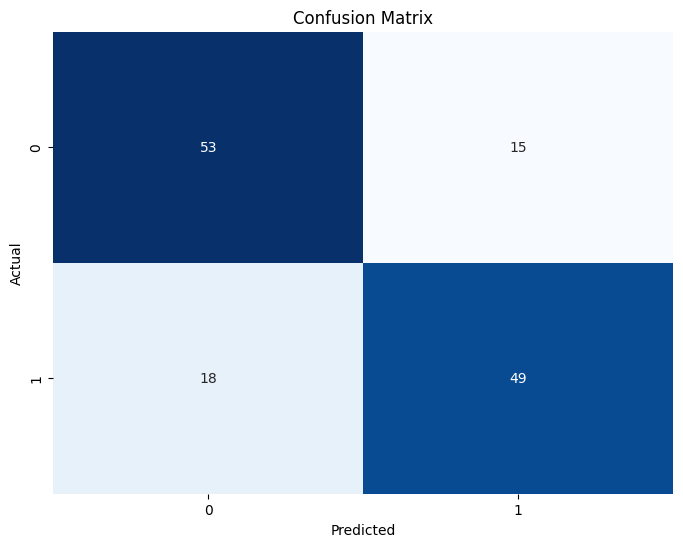

In [65]:

from sklearn.linear_model import LogisticRegression

# Separate features (X) and target variable (y)
X = df_balanced.drop('Class', axis=1)
y = df_balanced['Class']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train a LogisticRegression model
model_lr = LogisticRegression(random_state=42)  # You can adjust hyperparameters here
model_lr.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
accuracy_lr = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy_lr}")

# Plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


The model correctly predicts 53 non-diabetic cases (Class 0) and 49 diabetic cases (Class 1), but misclassifies 15 non-diabetic as diabetic and 18 diabetic as non-diabetic, indicating a higher rate of false positives and false negatives compared to the previous matrix.

              precision    recall  f1-score   support

           0       0.74      0.79      0.77        68
           1       0.77      0.72      0.74        67

    accuracy                           0.76       135
   macro avg       0.76      0.76      0.76       135
weighted avg       0.76      0.76      0.76       135

[[54 14]
 [19 48]]
Accuracy: 0.7555555555555555


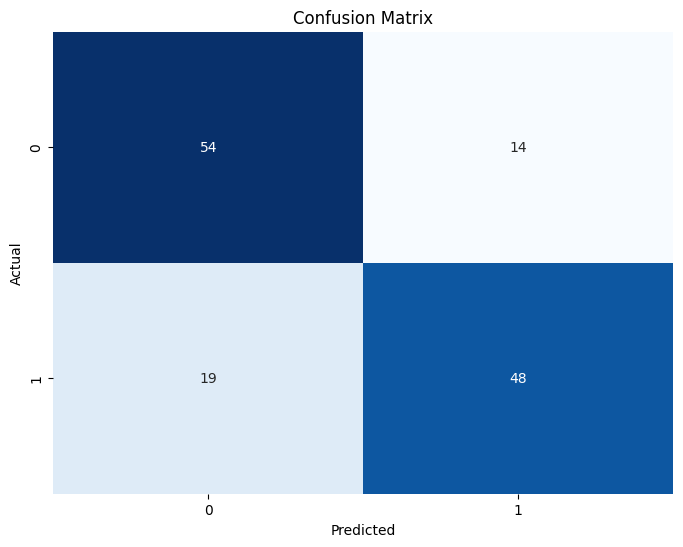

In [67]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Separate features (X) and target variable (y)
X = df_balanced.drop('Class', axis=1)
y = df_balanced['Class']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train an SVM classifier
model_svm = SVC(kernel='linear', random_state=42)  # You can change the kernel (e.g., 'rbf', 'poly')
model_svm.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model_svm.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
accuracy_svm = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy_svm}")

# Plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


The model correctly predicts 54 non-diabetic cases (Class 0) and 48 diabetic cases (Class 1), but misclassifies 14 non-diabetic as diabetic and 19 diabetic as non-diabetic, showing a slight increase in false negatives compared to the previous matrix.

              precision    recall  f1-score   support

           0       0.89      0.79      0.84        68
           1       0.81      0.90      0.85        67

    accuracy                           0.84       135
   macro avg       0.85      0.84      0.84       135
weighted avg       0.85      0.84      0.84       135

[[54 14]
 [ 7 60]]
Accuracy: 0.8444444444444444


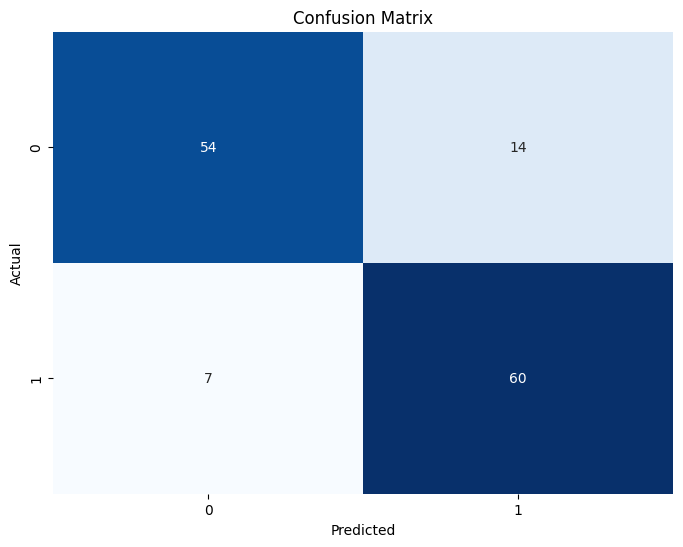

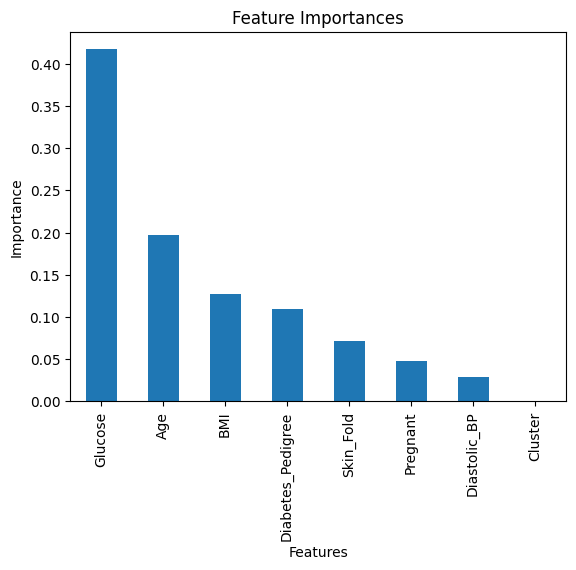

In [68]:
from sklearn.ensemble import GradientBoostingClassifier

# Separate features (X) and target variable (y)
X = df_balanced.drop('Class', axis=1)
y = df_balanced['Class']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train a Gradient Boosting Classifier
model_gb = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
model_gb.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model_gb.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
accuracy_gb = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy_gb}")

# Plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Plot feature importances
feature_importances = pd.Series(model_gb.feature_importances_, index=X.columns)
feature_importances.sort_values(ascending=False).plot(kind='bar')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importances')
plt.show()


The model excels at predicting diabetic cases (60 correct vs. 7 false negatives) but struggles with non-diabetic cases (14 false positives), while Glucose remains the most critical feature for prediction, far outweighing others like Age and BMI.

Class      0    1
Cluster          
0         61  165
1        276  172


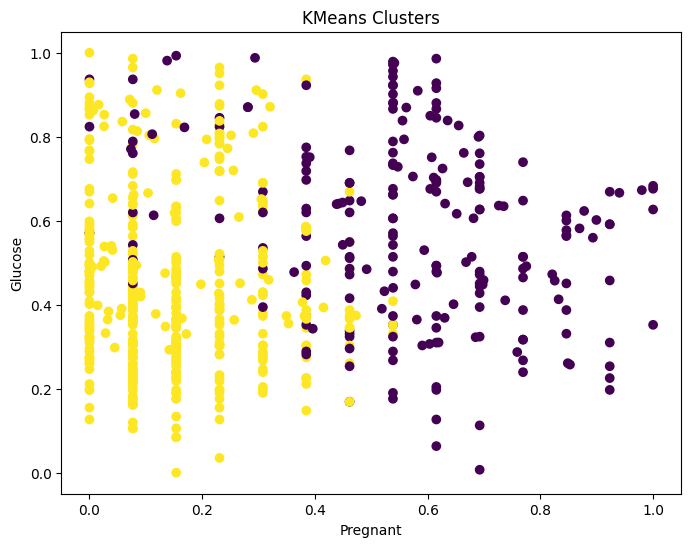

In [69]:
from sklearn.cluster import KMeans

X = df_balanced.drop('Class', axis=1)

# Initialize KMeans with the desired number of clusters (e.g., 2)
kmeans = KMeans(n_clusters=2, random_state=42)

# Fit the KMeans model to your data
kmeans.fit(X)

# Get cluster labels for each data point
cluster_labels = kmeans.labels_

# Add cluster labels to your DataFrame
df_balanced['Cluster'] = cluster_labels

# Now you can analyze the clusters
# For example, compare the cluster labels with the actual 'Class' labels:
print(pd.crosstab(df_balanced['Cluster'], df_balanced['Class']))

# Visualize the clusters (example using the first two features)
plt.figure(figsize=(8, 6))
plt.scatter(df_balanced.iloc[:, 0], df_balanced.iloc[:, 1], c=df_balanced['Cluster'])
plt.xlabel(df_balanced.columns[0])
plt.ylabel(df_balanced.columns[1])
plt.title('KMeans Clusters')
plt.show()


K-Means clustering groups the data into two clusters (yellow and purple), showing distinct patterns where higher pregnancy counts are often associated with lower glucose levels in one cluster, potentially indicating healthier profiles, while the other cluster shows a wider spread of glucose levels across pregnancies.

In [71]:
accuracy_km = accuracy_score(df_balanced['Class'], df_balanced['Cluster'])
print(f"KMeans Clustering Accuracy: {accuracy_km}")

KMeans Clustering Accuracy: 0.3456973293768546


              precision    recall  f1-score   support

           0       0.75      0.78      0.76        68
           1       0.77      0.73      0.75        67

    accuracy                           0.76       135
   macro avg       0.76      0.76      0.76       135
weighted avg       0.76      0.76      0.76       135

[[53 15]
 [18 49]]
Accuracy: 0.7555555555555555


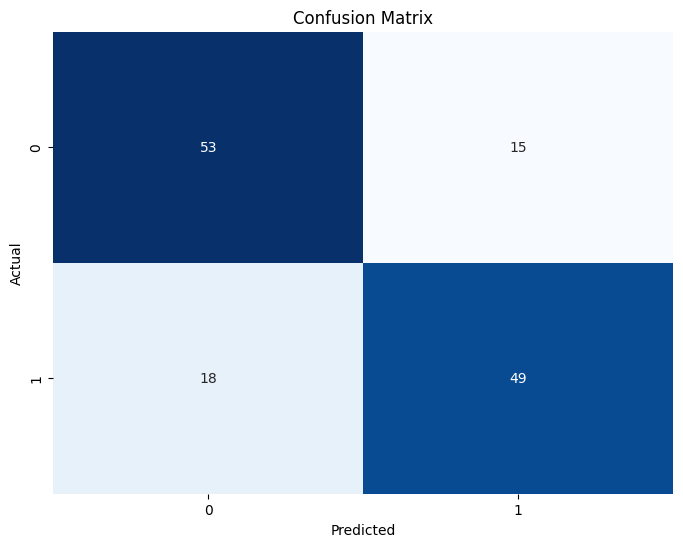

In [72]:

from sklearn.naive_bayes import GaussianNB
# Separate features (X) and target variable (y)
X = df_balanced.drop('Class', axis=1)
y = df_balanced['Class']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train a Gaussian Naive Bayes classifier
model_nb = GaussianNB()
model_nb.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model_nb.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
accuracy_nb = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy_nb}")

# Plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


The model correctly predicts 53 non-diabetic cases (Class 0) and 49 diabetic cases (Class 1), but misclassifies 15 non-diabetic as diabetic and 18 diabetic as non-diabetic, indicating a balanced but imperfect performance with room to reduce both false positives and false negatives.

In [74]:
models = {
    'Random Forest': accuracy_rf,
    'Decision Tree': accuracy_dt,
    'K-Nearest Neighbors': accuracy_kn,
    'Logistic Regression': accuracy_lr,
    'SVM': accuracy_svm,
    'Gradient Boosting': accuracy_gb,
    'KMeans': accuracy_km,
    'Naive Bayes': accuracy_nb
}

model_df = pd.DataFrame(models.items(), columns=['Model', 'Accuracy'])
print(model_df)

best_model = max(models, key=models.get)
print(f"\nBest Model: {best_model} with Accuracy: {models[best_model]}")


                 Model  Accuracy
0        Random Forest  0.859259
1        Decision Tree  0.785185
2  K-Nearest Neighbors  0.874074
3  Logistic Regression  0.755556
4                  SVM  0.755556
5    Gradient Boosting  0.844444
6               KMeans  0.345697
7          Naive Bayes  0.755556

Best Model: K-Nearest Neighbors with Accuracy: 0.8740740740740741


# hyper tuning

In [75]:
from sklearn.model_selection import GridSearchCV

# Separate features (X) and target variable (y)
X = df_balanced.drop('Class', axis=1)
y = df_balanced['Class']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the parameter grid for KNN
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],  # Try different numbers of neighbors
    'weights': ['uniform', 'distance'],  # Experiment with different weighting methods
    'metric': ['euclidean', 'manhattan']  # Explore different distance metrics
}

# Initialize KNN
knn = KNeighborsClassifier()

# Perform GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')  # Use 5-fold cross-validation
grid_search.fit(X_train, y_train)

# Get the best hyperparameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f"Best Hyperparameters: {best_params}")
print(f"Best Cross-Validation Score: {best_score}")

# Train a KNN model with the best hyperparameters
best_knn = KNeighborsClassifier(**best_params)
best_knn.fit(X_train, y_train)

# Make predictions on the test set
y_pred = best_knn.predict(X_test)

# Evaluate the model
accuracy_tuned_knn = accuracy_score(y_test, y_pred)
print(f"Accuracy of tuned KNN: {accuracy_tuned_knn}")


Best Hyperparameters: {'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'distance'}
Best Cross-Validation Score: 0.8070612668743511
Accuracy of tuned KNN: 0.8814814814814815
